<a href="https://colab.research.google.com/github/one-2730/ESAA-24-2/blob/Project/ESAA_YB_Mini_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YB 3조 미니프로젝트 1: movie

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 한글 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
movie_df = pd.read_csv("/content/drive/MyDrive/미니 프로젝트 1/movies_train.csv")
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
movie_df = pd.read_csv("/content/drive/MyDrive/미니 프로젝트 1/movies_train.csv", parse_dates = ['release_time'])
movie_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
movie_df.shape

(600, 12)

In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  270 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 56.4+ KB


##장르 별 변수 분석

장르 별 상영시간 (소윤)



In [ ]:
#장르별 상영시간의 평균을 모아본다.
time_per_genre = movie_df.groupby('genre')['time'].mean().reset_index()
time_per_genre

,genre,time
0,SF,101.384615
1,공포,100.214286
2,느와르,115.370370
3,다큐멘터리,88.053763
4,드라마,104.651584
5,멜로/로맨스,96.641026
6,뮤지컬,107.000000
7,미스터리,102.588235
8,서스펜스,112.000000
9,애니메이션,82.571429


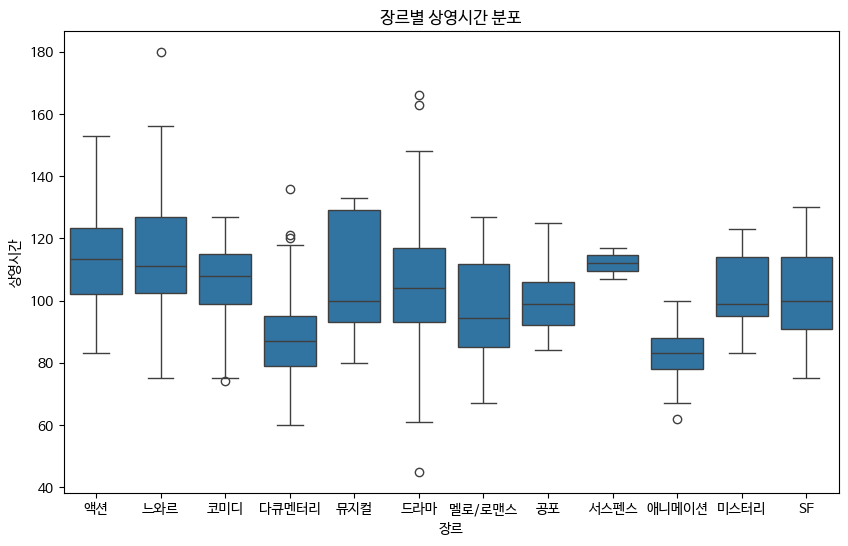

In [ ]:
#시각화를 진행하기 전, 이상점이 있는지를 확인하기 위해 박스플롯을 그려보았다.

plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='time', data=movie_df)
plt.rc('font', family='NanumBarunGothic')
plt.title('장르별 상영시간 분포')
plt.xlabel('장르')
plt.ylabel('상영시간')
plt.show()

#이상점(outlier) 존재를 확인했으므로 이상점이 있는 것과 제거한 것 둘다 시각화를 만들어보겠다.

In [ ]:
#박스플롯의 이상점을 제거하기 위해 Q1, Q3를 구해 이보다 작거나 큰 것을 제외시켜야했다. 이를 위해 Q1과 Q3를 구해준다.

Q1 = movie_df.groupby('genre')['time'].quantile(0.25)
Q3 = movie_df.groupby('genre')['time'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
#이상점을 제거하는 과정이다. map 메서드를 사용하여 바운더리 안에 있는 이상점이 아닌 것들만을 인덱싱하여 새로운 df를 만든다.

not_outlier = movie_df['time'].between(
    movie_df['genre'].map(lower_bound),
    movie_df['genre'].map(upper_bound)
)

modified_movie_df = movie_df[not_outlier]

#이상점을 제거했으니 장르별 평균을 구한다.
average_time_per_genre = modified_movie_df.groupby('genre')['time'].mean().reset_index()
average_time_per_genre

,genre,time
0,SF,101.384615
1,공포,100.214286
2,느와르,112.884615
3,다큐멘터리,86.800000
4,드라마,104.376147
5,멜로/로맨스,96.641026
6,뮤지컬,107.000000
7,미스터리,102.588235
8,서스펜스,112.000000
9,애니메이션,83.600000


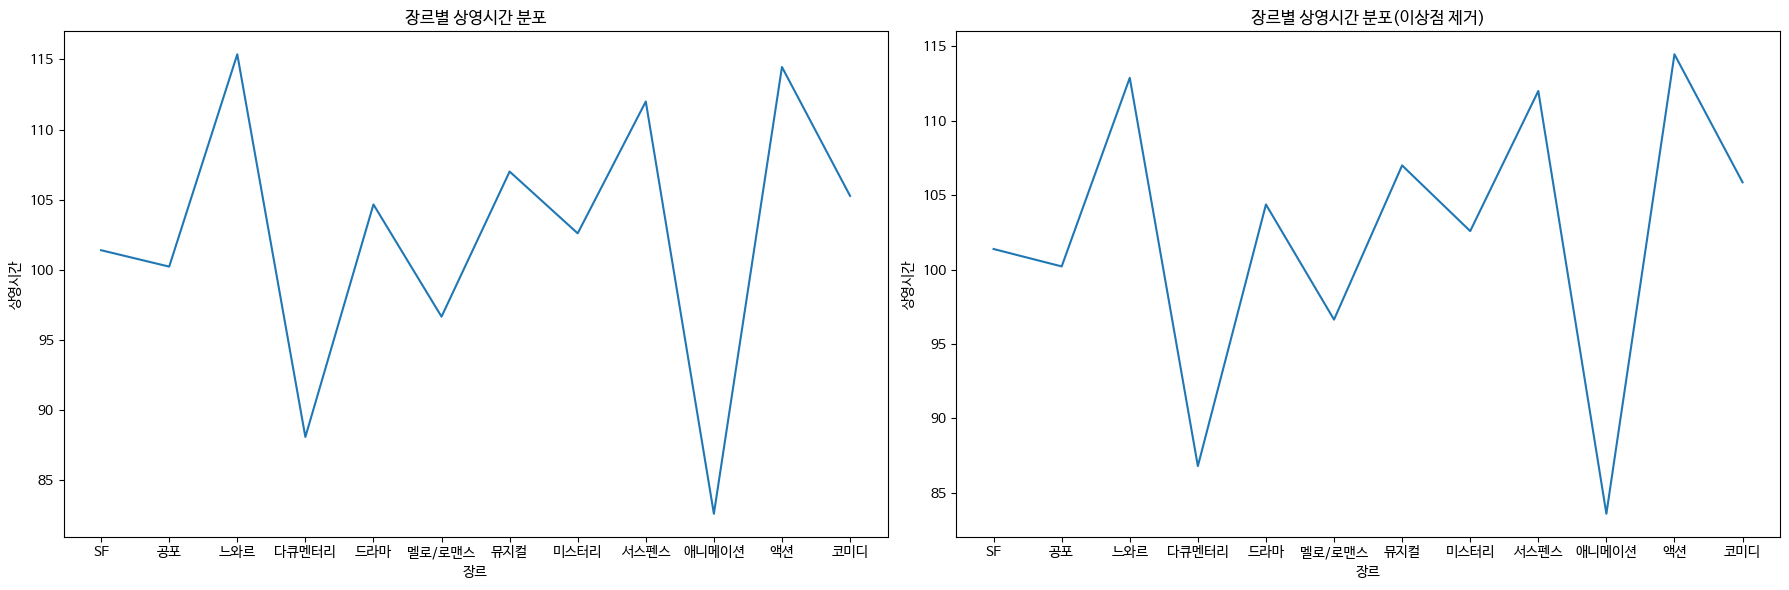

In [ ]:
#이상점 제거 전 장르별 상영시간 분포도 알아보고 싶었기 때문에 subplot으로 함께 배치

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

#이상점 제거 전 장르별 상영시간 분포
axs[0].plot(time_per_genre['genre'], time_per_genre['time'])
axs[0].set_title('장르별 상영시간 분포')
axs[0].set_xlabel('장르')
axs[0].set_ylabel('상영시간')

#이상점 제거 후 장르별 상영시간 분포
axs[1].plot(average_time_per_genre['genre'], average_time_per_genre['time'])
axs[1].set_title('장르별 상영시간 분포(이상점 제거)')
axs[1].set_xlabel('장르')
axs[1].set_ylabel('상영시간')

plt.tight_layout()
plt.show()

#이상점을 제거하지 않아도 크게 변하지 않는 것을 확인할 수 있었음.

장르 별 관객 수 (소윤)

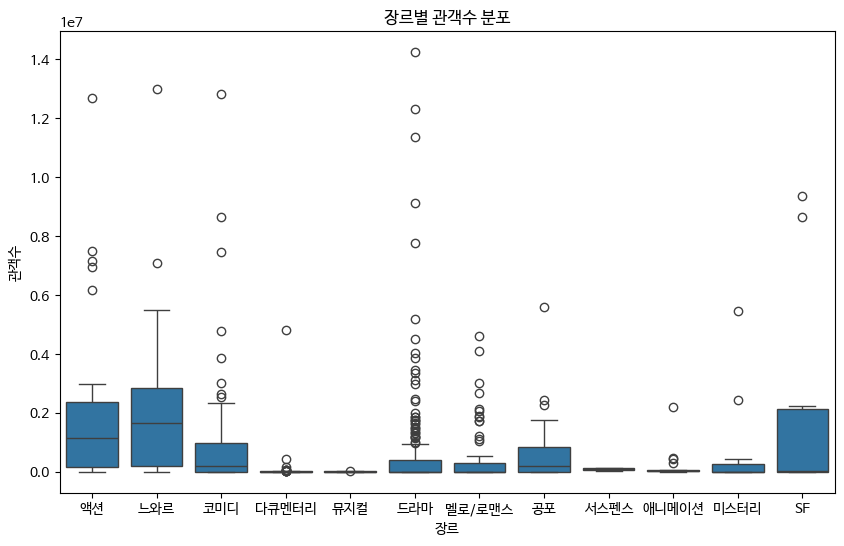

In [ ]:
#시각화를 진행하기 전, 이상점이 있는지를 확인하기 위해 박스플롯을 그려보았다.

plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='box_off_num', data=movie_df)
plt.title('장르별 관객수 분포')
plt.xlabel('장르')
plt.ylabel('관객수')
plt.show()

#해당 표를 보면 outlier가 너무 많음. 이상점을 제외시키는 것은 무리라고 생각해 다른 방법으로 시각화해보기로 결정했다.

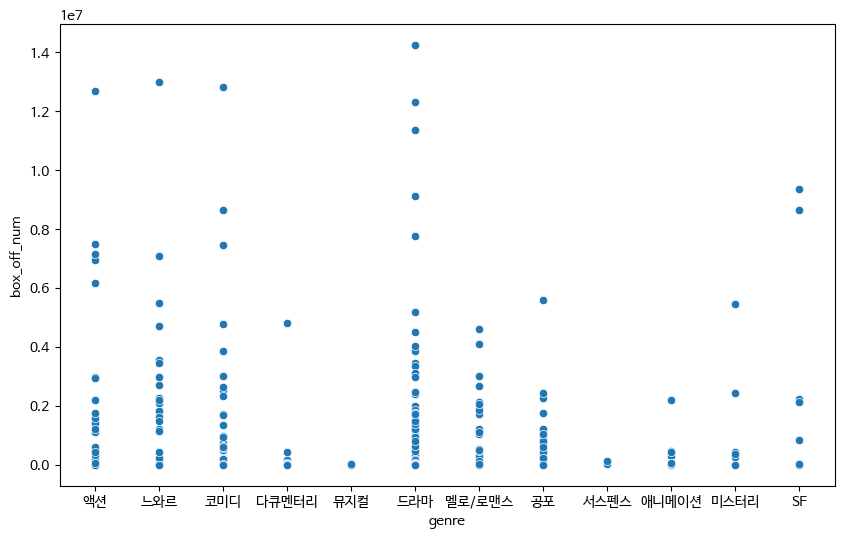

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='genre', y='box_off_num', data=movie_df)
plt.show()

#그래서 우선 scatter plot을 그려보면 대부분의 장르가 하단에 몰려있는 것을 확인. 다른 방법으로 장르별 관객수를 알아봐야겠다고 생각했다.

<BarContainer object of 12 artists>

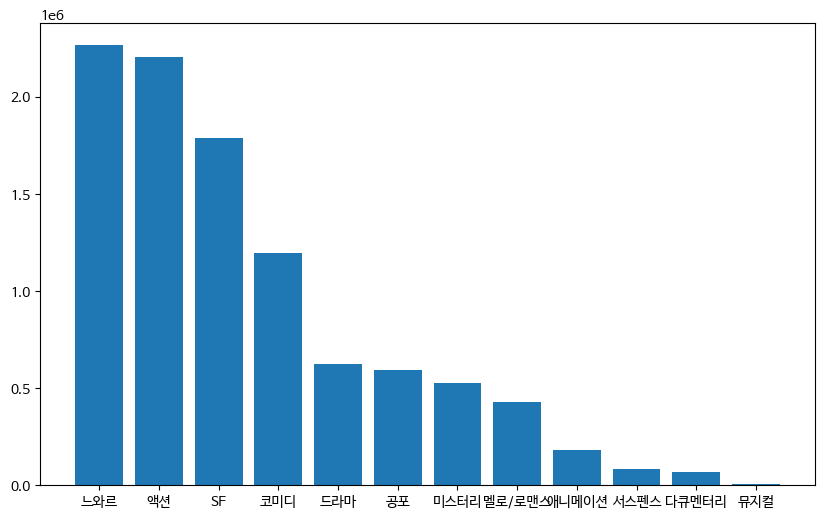

In [ ]:
plt.figure(figsize=(10, 6))
genre_num = movie_df.groupby('genre')['box_off_num'].mean().sort_values(ascending=False).reset_index()

plt.bar(genre_num['genre'], genre_num['box_off_num'])

#상위 10위를 모으기에는 영화의 개수가 달라 점수를 통해 순위를 책정할 수 없다고 판단, 전반적으로 장르별 인기를 확인하고 싶었다.

*장르* 별 스탭 수 (혜준)


In [ ]:
# num_staff 평균이 큰 순서대로 genre와 그의 num_staff 평균 출력
genre_staff = movie_df[['genre','num_staff']].groupby('genre').mean().sort_values('num_staff', ascending=False)
genre_staff = genre_staff.reset_index()
print(genre_staff)

     genre   num_staff
0       액션  337.535714
1      느와르  311.074074
2      코미디  209.075472
3       SF  197.307692
4       공포  176.380952
5      드라마  164.484163
6   멜로/로맨스  135.782051
7     미스터리  117.352941
8     서스펜스  111.000000
9    애니메이션   44.619048
10   다큐멘터리   17.849462
11     뮤지컬    2.200000


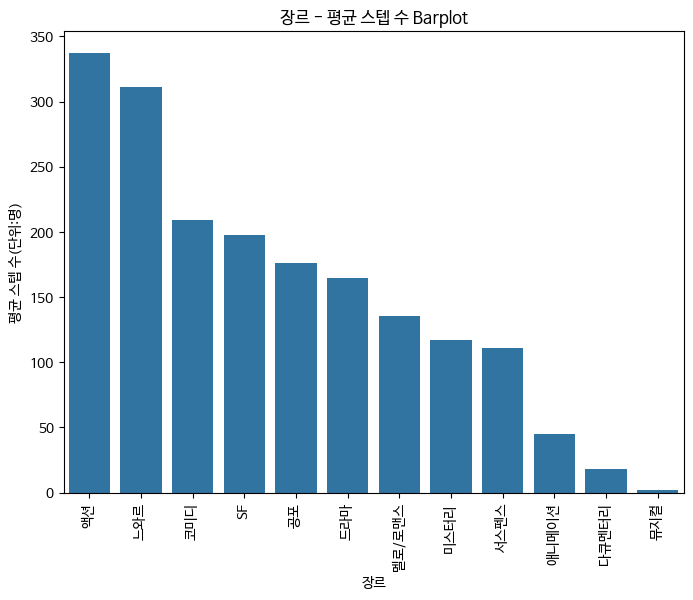

In [ ]:
# num_staff 평균이 큰 genre 순서대로 barplot 그리기
plt.figure(figsize=(7,6))
sns.barplot(x=genre_staff.genre.values, y=genre_staff.num_staff)
plt.title('장르 - 평균 스텝 수 Barplot')
plt.xlabel('장르')
plt.ylabel('평균 스텝 수(단위:명)')
plt.xticks(rotation='vertical')
plt.show()

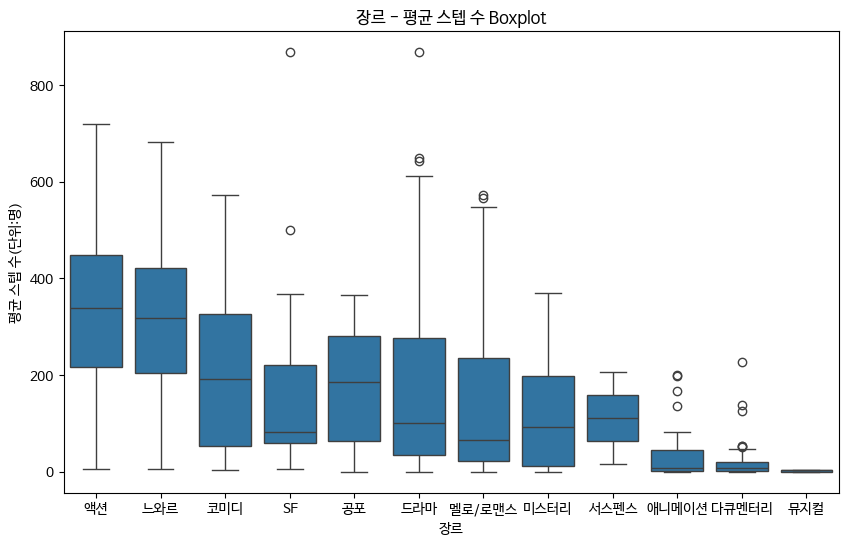

In [ ]:
# num_staff 평균이 큰 genre 순서대로 Boxplot 그리기
order = genre_staff.genre.values
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='num_staff', data=movie_df, order=order)
plt.title('장르 - 평균 스텝 수 Boxplot')
plt.xlabel('장르')
plt.ylabel('평균 스텝 수(단위:명)')
plt.show()

장르 별 배우 수 (다현)

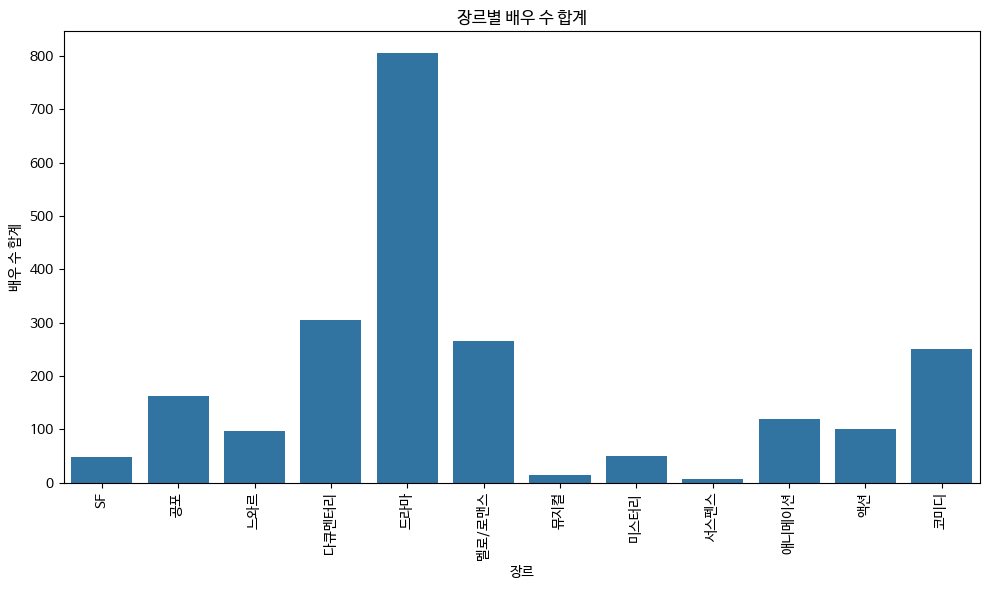

In [ ]:
genre_actor_sum = movie_df.groupby('genre')['num_actor'].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(x='genre', y='num_actor', data=genre_actor_sum)
plt.title('장르별 배우 수 합계')
plt.xlabel('장르')
plt.ylabel('배우 수 합계')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

장르 별 등급 (다현)
   

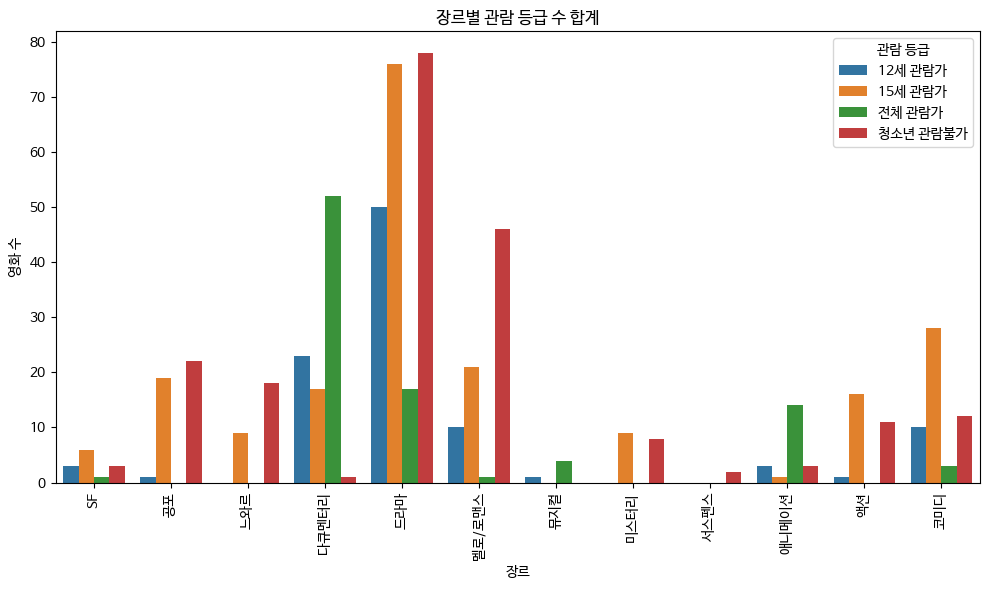

In [ ]:
genre_rating_count = movie_df.groupby(['genre', 'screening_rat']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(10, 6))
plt.rc('font', family='NanumBarunGothic')


sns.barplot(x='genre', y='count', hue='screening_rat', data=genre_rating_count, ax=ax)
ax.set_title('장르별 관람 등급 수 합계')
ax.set_xlabel('장르')
ax.set_ylabel('영화 수')
ax.tick_params(axis='x', rotation=90)
ax.legend(title='관람 등급')

plt.tight_layout()
plt.show()

##변수 별 관객 수 분석

스텝 수 별 관객 수 (혜준)

In [ ]:
# 관객 수 q1, q2, q3를 기준으로 각각 다른 값을 갖는 새로운 칼럼 box_range 생성
movie_df_1 = movie_df
x=movie_df_1.num_staff
y=movie_df_1.box_off_num
movie_df_1['box_range']=None

for i in range(len(y)):
  if (y[i]>y.min()) & (y[i]<y.quantile(.25)):
    movie_df.at[i, 'box_range'] = 1
  if (y[i]>y.quantile(.25)) & (y[i]<y.quantile(.5)):
    movie_df.at[i, 'box_range'] = 2
  if (y[i]>y.quantile(.5)) & (y[i]<y.quantile(.75)):
    movie_df.at[i, 'box_range'] = 3
  if (y[i]>y.quantile(.75)) & (y[i]<y.max()):
    movie_df.at[i, 'box_range'] = 4

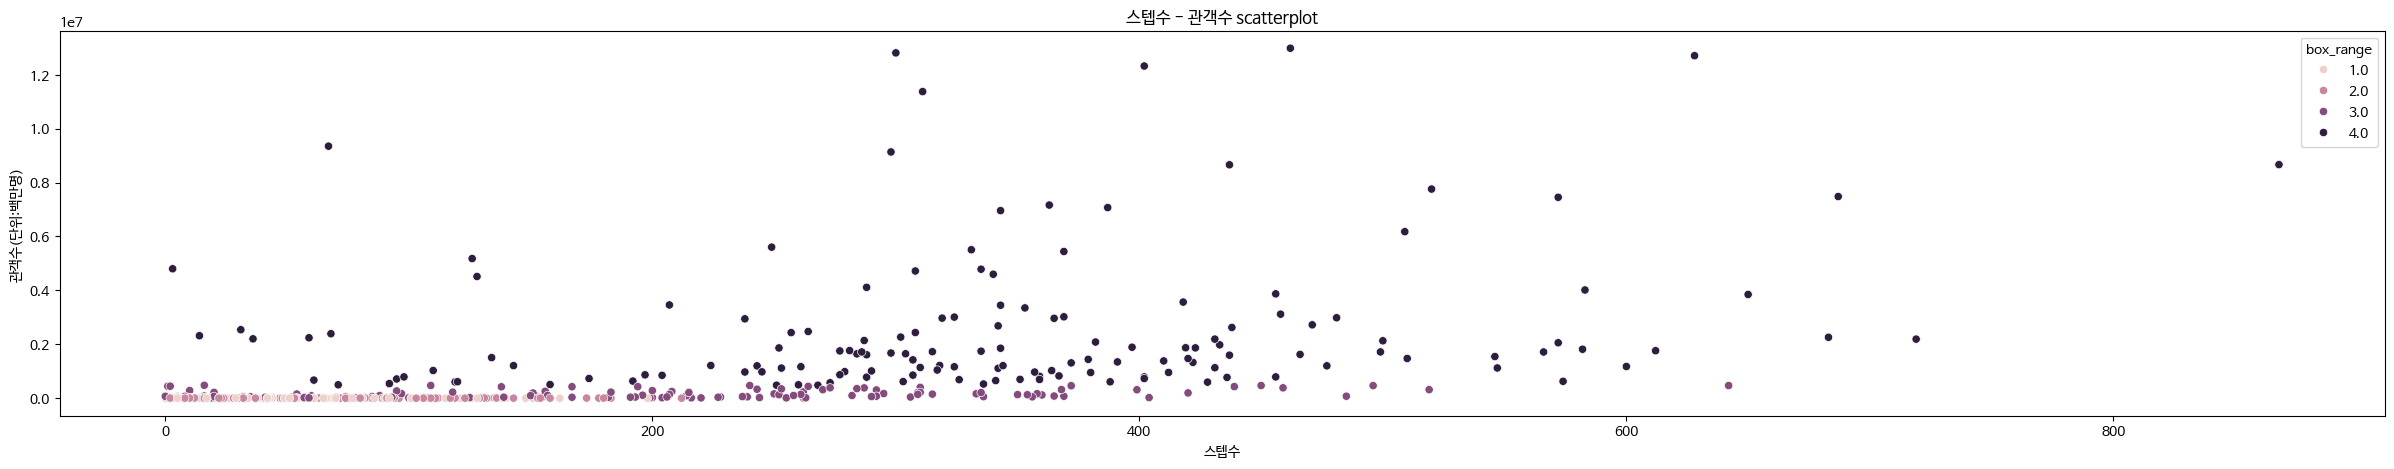

In [ ]:
# 관객 수가 많을수록(범주 4개) 진한 색의 점으로 표시되는 scatter plot 그리기
plt.figure(figsize=(30,5))
plt.rc('font', family='NanumBarunGothic')
sns.scatterplot(x='num_staff', y='box_off_num', hue='box_range', data=movie_df_1)
plt.title('스텝수 - 관객수 scatterplot')
plt.xlabel('스텝수')
plt.ylabel('관객수(단위:백만명)')
plt.show()

등급 별 관객 수 (은서)

In [ ]:
rat_boxnum_sum =movie_df.groupby('screening_rat')['box_off_num'].sum()
rat_boxnum_sum=pd.DataFrame(rat_boxnum_sum).reset_index()
rat_boxnum_sum

,screening_rat,box_off_num
0,12세 관람가,86188052
1,15세 관람가,251998766
2,전체 관람가,12429242
3,청소년 관람불가,74292991


In [ ]:
rat_boxnum_mean =movie_df.groupby('screening_rat')['box_off_num'].mean()
rat_boxnum_mean=pd.DataFrame(rat_boxnum_mean).reset_index()
pd.set_option('display.float_format', '{:.0f}'.format)
rat_boxnum_mean

,screening_rat,box_off_num
0,12세 관람가,844981
1,15세 관람가,1247519
2,전체 관람가,135100
3,청소년 관람불가,364181


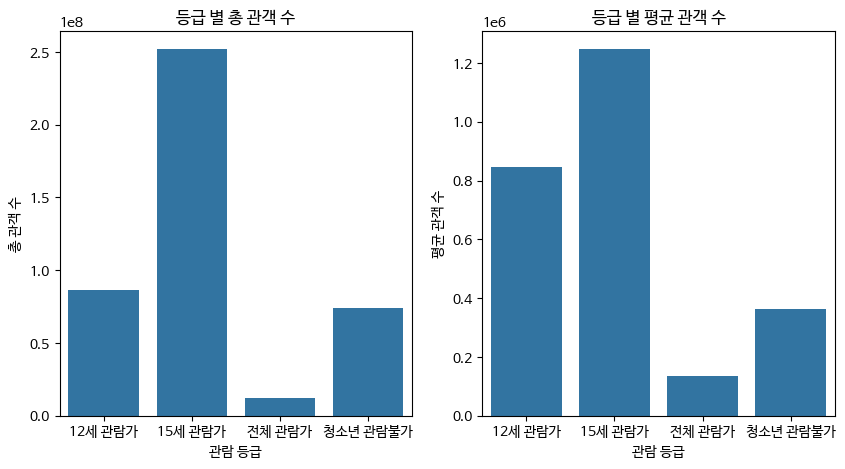

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
plt.rc('font', family='NanumBarunGothic')
sns.barplot(x='screening_rat', y='box_off_num', data=rat_boxnum_sum, ax=ax[0])
ax[0].set_title('등급 별 총 관객 수')
ax[0].set_xlabel('관람 등급')
ax[0].set_ylabel('총 관객 수')

sns.barplot(x='screening_rat', y='box_off_num', data=rat_boxnum_mean, ax=ax[1])
ax[1].set_title('등급 별 평균 관객 수')
ax[1].set_xlabel('관람 등급')
ax[1].set_ylabel('평균 관객 수')

plt.show()

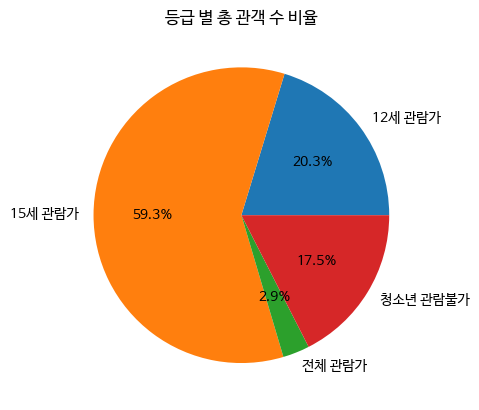

In [ ]:
plt.pie(x=rat_boxnum_sum['box_off_num'], labels=rat_boxnum_sum['screening_rat'], autopct='%.1f%%')
plt.title('등급 별 총 관객 수 비율')
plt.show()

개봉 월 별 관객 수 (은서)

In [ ]:
movie_df['release_time_month'] = 0

n = len(movie_df['release_time'])
for i in range(n):
    movie_df.loc[i, 'release_time_month'] = movie_df['release_time'][i].month

movie_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,box_range,release_time_month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,3,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602,2,387,3,7072501,4,11
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775,4,343,4,6959083,4,6
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894,2,20,6,217866,3,7
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1,1,251,2,483387,4,11


In [ ]:
month_boxnum_mean= pd.DataFrame(movie_df.groupby('release_time_month')['box_off_num'].mean()).reset_index()
# month_boxnum_mean

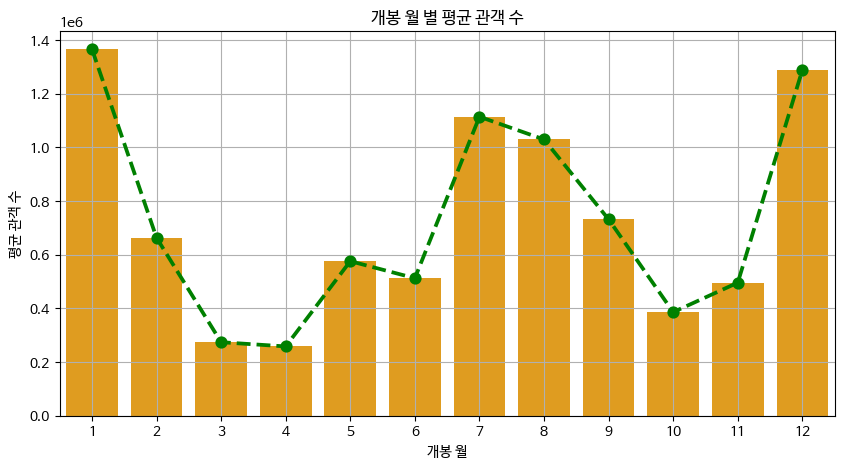

In [ ]:
plt.figure(figsize=(10, 5))
sns.pointplot(x='release_time_month', y='box_off_num', data=month_boxnum_mean, color='green', linestyles='--')
sns.barplot(x='release_time_month', y='box_off_num', data=month_boxnum_mean, color='orange')
plt.grid(True)
plt.title('개봉 월 별 평균 관객 수')
plt.xlabel('개봉 월')
plt.ylabel('평균 관객 수')
plt.show()

개봉 일 별 관객 수 (지원)

In [ ]:
movie_consumer = pd.DataFrame(movie_df.groupby('release_time', as_index=False)['box_off_num'].sum())
movie_consumer['release_year'] = movie_consumer['release_time'].dt.year
movie_consumer

,release_time,box_off_num,release_year
0,2010-01-02,353,2010
1,2010-01-14,326613,2010
2,2010-01-21,730977,2010
3,2010-01-28,462714,2010
4,2010-02-04,2821,2010
...,...,...,...
325,2015-12-16,9522444,2015
326,2015-12-17,1599,2015
327,2015-12-24,329,2015
328,2015-12-30,627586,2015


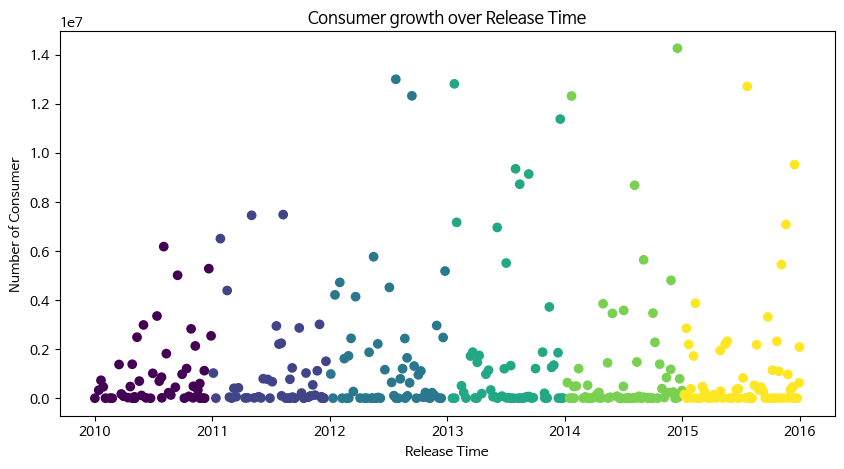

In [ ]:
plt. figure(figsize = (10, 5))

plt.scatter(movie_consumer['release_time'], movie_consumer['box_off_num'], c = movie_consumer['release_year'])

plt.title('Consumer growth over Release Time')
plt.xlabel('Release Time')
plt.ylabel('Number of Consumer')

plt.show()

##배급사 별 변수 분석

배급사 별 감독 전작 평균 관객 수 (지원)

In [ ]:
top6_distributor = movie_df['distributor'].value_counts().head(6).index

movie_top_distributor = movie_df[movie_df['distributor'].isin(top6_distributor)]
movie_top_distributor = movie_top_distributor.dropna()
movie_top_distributor.shape

(130, 14)

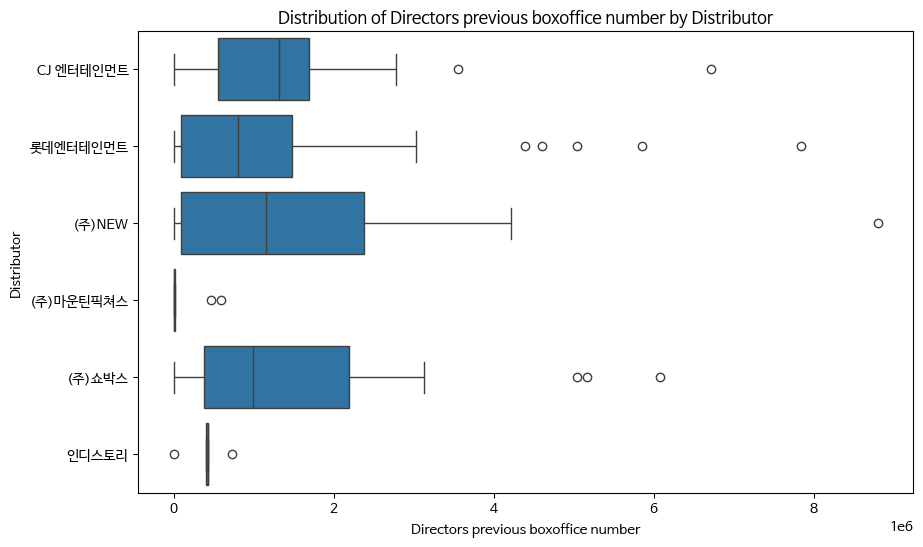

In [ ]:
distributor_order = ['CJ 엔터테인먼트', '롯데엔터테인먼트', '(주)NEW', '(주)마운틴픽쳐스', '(주)쇼박스', '인디스토리']

plt.figure(figsize = (10, 6))

sns.boxplot(data = movie_top_distributor, x = 'dir_prev_bfnum', y = 'distributor', order = distributor_order)

plt.title('Distribution of Directors previous boxoffice number by Distributor')
plt.xlabel('Directors previous boxoffice number')
plt.ylabel('Distributor')
plt.show()

배급사 별 감독 전작 수 (지원)

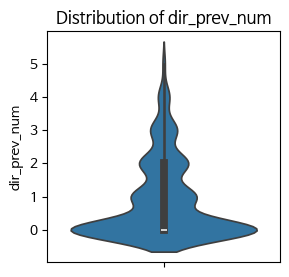

In [ ]:
plt.figure(figsize = (3, 3))

sns.violinplot(movie_df['dir_prev_num'])

plt.title('Distribution of dir_prev_num')
plt.show()

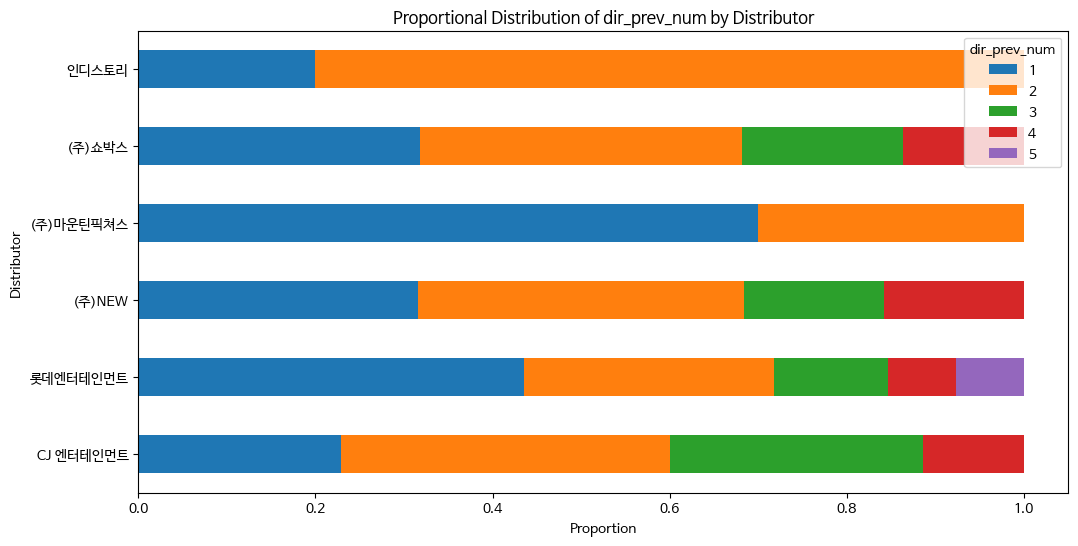

In [ ]:
proportions = movie_top_distributor.groupby('distributor')['dir_prev_num'].value_counts(normalize=True).unstack()
proportions = proportions.reindex(distributor_order)

proportions.plot(kind='barh', stacked=True, figsize=(12, 6))

plt.title('Proportional Distribution of dir_prev_num by Distributor')
plt.xlabel('Proportion')
plt.ylabel('Distributor')
plt.legend(title='dir_prev_num')
plt.show()